In [1]:
import sys
sys.path.append("../lib/")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker

from DalitzModel import *
from BWRes import *

%matplotlib inline
plt.rc('animation', html='html5')
plt.rc('text', usetex=True)
plt.rc('font', size=18)

In [2]:
degtorad = np.pi / 180.

In [3]:
def plot_ddist(mab, mbc, bins=200, num=None):
    """ Scatter plot of Dalitz distribution """
    fig = plt.figure(num=num, figsize=(8,6))
    ax = fig.add_subplot(111)
    hist = ax.hist2d(mab, mbc, bins=bins, cmap=plt.cm.PuBu)
    fig.colorbar(hist[3], ax=ax, pad=0.02)

In [4]:
def phsp_edge(phsp, rtype1, rtype2):
    """ Calculate phase space edges """
    mr1_min, mr1_max = phsp.mass_sq_range[rtype1]
    mr1_space = np.linspace(mr1_min, mr1_max, 1000)
    mr2_mins, mr2_maxs = phsp.mr_sq_range(rtype2, mr1_space, rtype1)
    mr1 = np.concatenate([mr1_space, mr1_space[::-1]])
    mr2 = np.concatenate([mr2_mins, mr2_maxs[::-1]])
    return [mr1, mr2]

In [5]:
def show_phase_space(phsp, rtype1, rtype2, num=None, color=None):
    """ Plot phase space edge """
    if color is None:
        color = 'blue'
    mr1, mr2 = phsp_edge(phsp, rtype1, rtype2)
    mr1_range = max(mr1) - min(mr1)
    mr2_range = max(mr2) - min(mr2)
    fig = plt.figure(num=num)
    plt.plot(mr1, mr2, linestyle='-', color=color)
    plt.gca().set_xlabel(r'$m^{2}_{\mathrm{' + rtype1 + r'}}\ (GeV^{2}/c^{4})$')
    plt.gca().set_ylabel(r'$m^{2}_{\mathrm{' + rtype2 + r'}}\ (GeV^{2}/c^{4})$')
    plt.axis('equal')
    plt.tight_layout()
    plt.xlim(0, 1.05*max(mr1))
    plt.ylim(0, 1.05*max(mr2))

In [6]:
model = DalitzModel(.475, .135, .135, 1.865)
model.add_bw(.770, .1490, 1, 'BC')
model.add_bw(.89166, 0.0508, 1, 'AB', 0.638*np.exp(1j*133.2*degtorad))

In [7]:
print model

Phase space D -> ABC, where
 mD = 1.865, mA = 0.475, mB = 0.135, mC = 0.135


../lib/DalitzPhaseSpace.py:146: RuntimeWarning: divide by zero encountered in divide
  cos_hel = (mr2_rng[0] + mr2_rng[1] - 2.*mr2_sq) / (mr2_rng[1] - mr2_rng[0])
../lib/AngularDistribution.py:12: RuntimeWarning: invalid value encountered in multiply
  return -2. * cos_hel * mompq


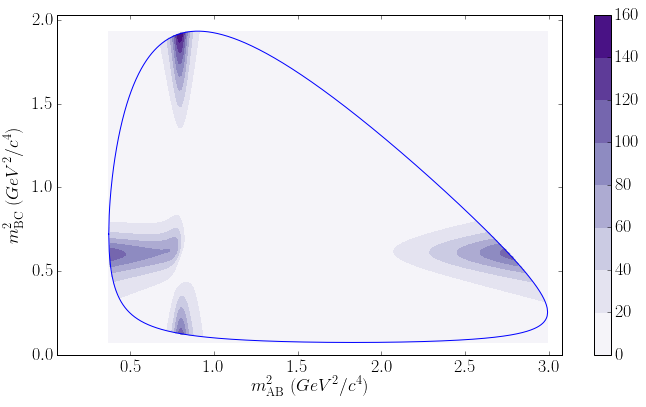

In [8]:
# abgrid, bcgrid = model.grid('AB', 'BC', 30)
# plt.plot(abgrid, bcgrid, 'bo')
fig = plt.figure(num=6, figsize=(10, 6))
msq1g, msq2g, dens = model.grid_dens('AB', 'BC', 250)
show_phase_space(model, 'AB', 'BC', 6, 'blue')
# CS = plt.contour(msq1g, msq2g, dens)
# plt.clabel(CS, inline=4, fontsize=1)
# CS = plt.contourf(msq1g, msq2g, dens, locator=ticker.LogLocator(), cmap=plt.cm.PuBu);
CS = plt.contourf(msq1g, msq2g, dens, cmap=plt.cm.Purples);
plt.colorbar(CS)

In [9]:
mab_sq_range = model.mass_sq_range['AB']
mab_sq_range

[0.37209999999999999, 2.9929000000000001]

In [10]:
dens = model.density(1., 1.)
dens

4.239787346995687

In [11]:
majorant = model.assess_majorant()
majorant

238.30104490954983

In [12]:
rtype1, rtype2 = 'AB', 'BC'
mab_sq, mbc_sq = model.sample(10**6, rtype1, rtype2)

43298 events generated
86668 events generated
129938 events generated
172998 events generated
216646 events generated
259814 events generated
303004 events generated
346399 events generated
389602 events generated
432789 events generated
475989 events generated
519384 events generated
562549 events generated
605732 events generated
648972 events generated
692451 events generated
735449 events generated
778148 events generated
821083 events generated
864440 events generated
907619 events generated
950700 events generated
993864 events generated
1037083 events generated


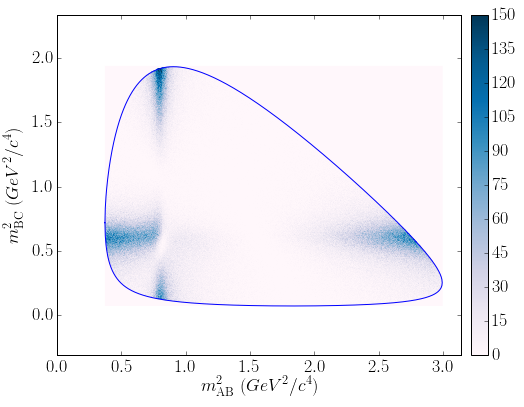

In [13]:
plot_ddist(mab_sq, mbc_sq, 400, 5)
show_phase_space(model, rtype1, rtype2, 5)

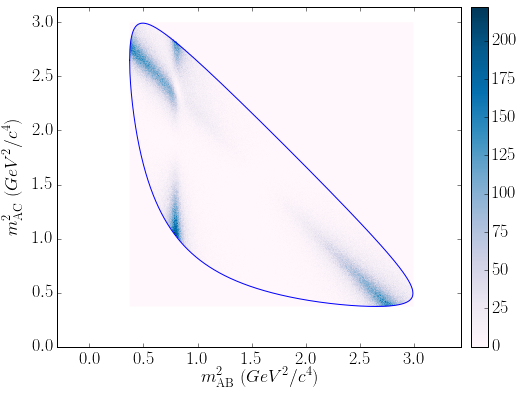

In [14]:
mac_sq = model.third_mass_sq(mab_sq, mbc_sq)
plot_ddist(mab_sq, mac_sq, 400, 5)
show_phase_space(model, 'AB', 'AC', 5)

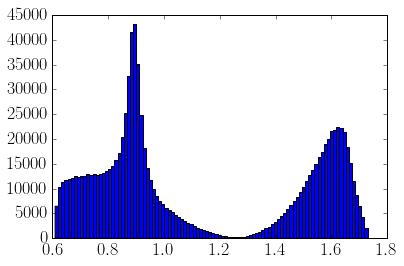

In [15]:
plt.hist(np.sqrt(mab_sq), bins=100);

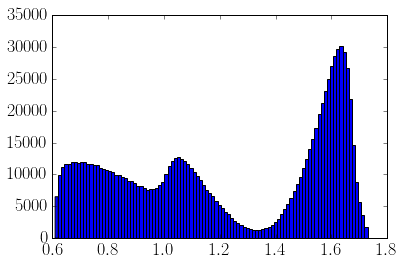

In [16]:
plt.hist(np.sqrt(mac_sq), bins=100);

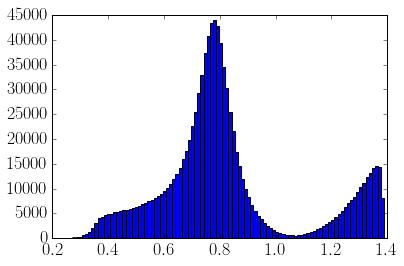

In [17]:
plt.hist(np.sqrt(mbc_sq), bins=100);